In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

/Users/toast/anaconda2/lib/python2.7/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


# (Unsupervised) k-Mean Clustering

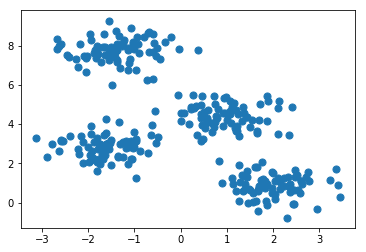

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

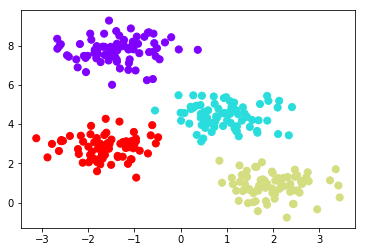

In [3]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');


K-Means is an example of an algorithm which uses an Expectation-Maximization approach to arrive at the solution. Expectation-Maximization is a two-step approach which works as follows:
Guess some cluster centers
Repeat until converged A. Assign points to the nearest cluster center B. Set the cluster centers to the mean

Drawback: number of clusters is a hyperparameter

Use: density based models, spectral clustering, etc. instead.

or

find a bigger hammer and use brute force

## Silhuette score = measure of compactness of clusters

$s := \frac{b-a}{\max(a,b)}$

$a$ are the mean distances between a sample and all other points in the same class

$b$ the same with respect to the next nearest cluster

In [11]:
from sklearn import metrics
k_range = range(2,10)
silh_scores = []
for n_clusters in k_range:
    kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=100)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    score = metrics.silhouette_score(X, labels, metric='sqeuclidean')
    silh_scores.append(score)
    print("%i Silhoutte score: %0.3f"%(n_clusters, score))

2 Silhoutte score: 0.559
3 Silhoutte score: 0.597
4 Silhoutte score: 0.606
5 Silhoutte score: 0.565
6 Silhoutte score: 0.579
7 Silhoutte score: 0.583
8 Silhoutte score: 0.567
9 Silhoutte score: 0.578


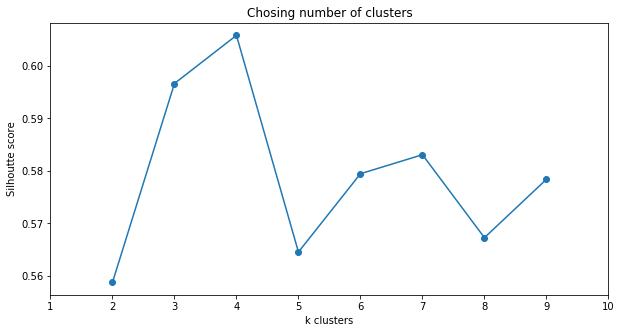

In [12]:
plt.figure(figsize=(10,5))
plt.plot(k_range,silh_scores,linestyle='-', marker='o')
plt.xlim((1,max(k_range)+1))
plt.xlabel('k clusters')
plt.ylabel('Silhoutte score')
plt.title('Chosing number of clusters');

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

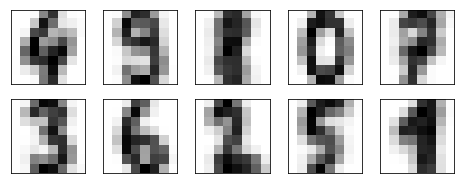

In [6]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

In [7]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

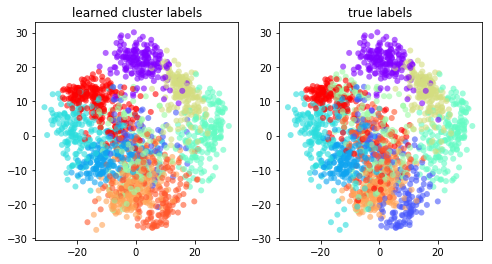

In [8]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7918753478018921

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 156   0   2   0   6   7  12]
 [  0   7   0   0 162   0   0  10   2   0]
 [  0   0   0   1   1 137   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0   6   3   2   0   6   2   3 102  50]
 [  0  20   0   6   0   7   0   8   0 139]]


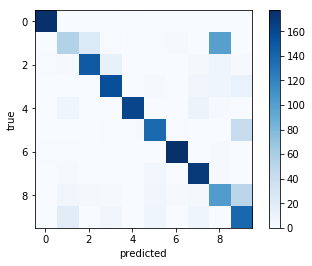

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');
